In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [12]:
df = pd.read_csv('PHDRS.csv')


In [13]:
df.head()

,Glimmer,MOD,OL,AO
0,910,NaN,3,LANDING
1,910,NaN,3,LANDING
2,745,NaN,3,LANDING
3,745,NaN,4,LANDING
4,745,1.0,4,LANDING


### Glimmer exploration

In [14]:
df['Glimmer'].describe()

count     914.000000
mean      822.264770
std       182.061825
min       415.000000
25%       745.000000
50%       745.000000
75%       910.000000
max      1240.000000
Name: Glimmer, dtype: float64

In [15]:
df['Glimmer'].median()

np.float64(745.0)

In [16]:
df['Glimmer'].mode()

0    910
Name: Glimmer, dtype: int64

In [17]:
#rounding because you can't get a fraction of a glimmer.
round(df['Glimmer'].mean())

822

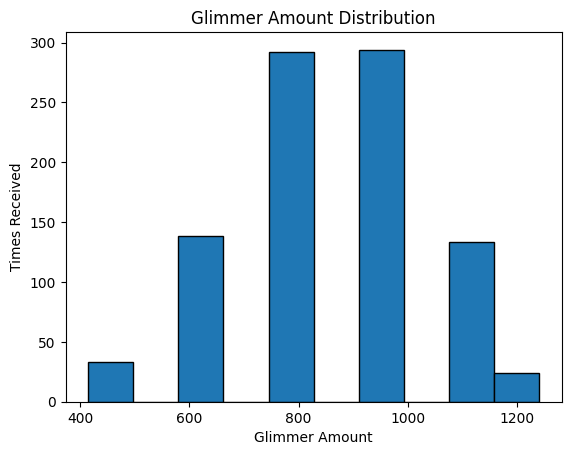

In [18]:
plt.hist(df['Glimmer'], edgecolor='black')
plt.xlabel('Glimmer Amount')
plt.ylabel('Times Received')
plt.title("Glimmer Amount Distribution")
plt.savefig("stigma glimmer distribution.png")

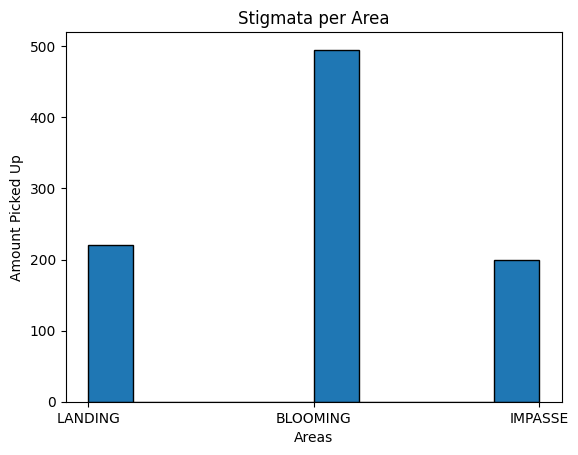

In [30]:
plt.hist(df['AO'], edgecolor='black')
plt.xlabel('Areas')
plt.ylabel('Amount Picked Up')
plt.title("Stigmata per Area")
plt.savefig("stigma area distribution.png")

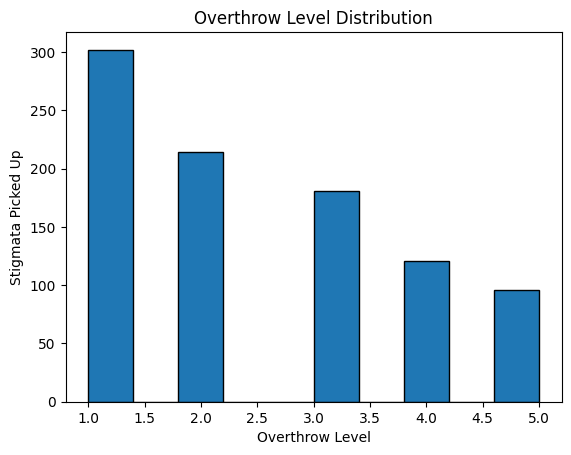

In [31]:
plt.hist(df['OL'], edgecolor='black')
plt.xlabel('Overthrow Level')
plt.ylabel('Stigmata Picked Up')
plt.title("Overthrow Level Distribution")
plt.savefig("stigmata level distribution.png")

In [19]:
df['Glimmer'].value_counts(normalize=True) * 100

Glimmer
910     32.166302
745     31.947484
580     15.098468
1075    14.551422
415      3.610503
1240     2.625821
Name: proportion, dtype: float64

In [20]:
df.groupby('Glimmer')['AO'].unique().reset_index()

,Glimmer,AO
0,415,"[BLOOMING, IMPASSE, LANDING]"
1,580,"[LANDING, BLOOMING, IMPASSE]"
2,745,"[LANDING, BLOOMING, IMPASSE]"
3,910,"[LANDING, BLOOMING, IMPASSE]"
4,1075,"[LANDING, BLOOMING, IMPASSE]"
5,1240,"[BLOOMING, IMPASSE, LANDING]"


In [27]:
#percentage of time you pick up a stigma and get nothing but glimmer 
count_nan_rows = df.iloc[:, 1:2].isna().all(axis=1).sum()
count_all_rows = df.shape[0]
print(str(count_nan_rows) + "/" + str(count_all_rows))
print(str(round(((count_nan_rows/count_all_rows)*100), 3)) + "%")

890/914
97.374%


In [29]:
moddrop = (df['MOD']==True).sum()
print(moddrop)
moddroprate_o = round(((moddrop/count_all_rows) *100), 3)
print(str(moddroprate_o) + "%")

24
2.626%
